# reLAISS Tutorial 01
### written by Evan Reynolds and Alex Gagliano

reLAISS is the second version of LAISS (Lightcurve Anomaly Identification & Similarity Search); a tool to find similar supernovae & identify anomalous supernovae (and the galaxies that host them) using their photometric features. reLAISS introduces several new functionalites, some of which will be presented in this tutorial.

The similarity search takes advantage of [Approximate Nearest Neighbors Oh Yeah (ANNOY)](https://github.com/spotify/annoy), the approximate nearest neighbors algorithm developed by Spotify that allows you to come up with a relevant song to listen to before your current one ends. The anomaly detection classifier is an isolation forest model trained on a dataset bank of (currently) 22,000 transients.

Let's start by installing and loading the relevant packages:

In [1]:
# TODO: Code to install necessary packages. Maybe Alex can help?

In [2]:
import os
import sys

import warnings
warnings.filterwarnings("ignore")

working_dir = os.path.abspath("")
os.chdir(working_dir)
sys.path.append('../code/')

import constants
from helper_func import *
from relaiss_func import *

Let's also download and unpack the data we need for this tutorial: 

In [3]:
# TODO: Download sfd data, dataset bank (and theorized_lc data, if you want to show this)
# Alex to help with this? Make sure data is in the right spot for the rest of the tutorial

Now, we must choose the features of both the host galaxy and the supernova lightcurve to use in our matching algorithm & anomaly classifer. Open the constants.py file in the "code" directory and review the lightcurve and host features. Comment out any features you'd like to exclude. Then, restart the notebook kernel, reimport packages, and run the code below.

In [4]:
lc_feature_names = constants.lc_features_const.copy()
host_feature_names = constants.host_features_const.copy()

The rest is taken care of by our main function, `re_LAISS`. There are many inputs to the function, but here are the basic ones:
* `path_to_dataset_bank`: The path from your working directory to the dataset bank downloaded earlier.
* `transient_ztf_id`: The ZTF ID of the supernova used in the similarity search and anomaly detection. 
* `lc_feature_names`: The names of the lightcurve features to be used, which we defined earlier.
* `host_feature_names`: The names of the host galaxy features to be used, which we defined earlier.
* `path_to_sfd_data_folder`: The path from your working directory to the sfd data folder downloaded earlier.
* `neighbors`: The number of "nearest neighbors" to return from the similarity search.
* `num_mc_simulations`: reLAISS can resample the input feature set using Monte Carlo simulation with feature errors. This is the number of simulations it will use. Set to 0 to turn off this feature.
* `weight_lc_feats_factor`: A factor that multiplicatively weights the effect of the lightcurve features.
* `suggest_neighbor_num`: A boolean that, if true, will show a plot of neighbors and distances from the input supernova and suggest a number of neighbors to look at.
* `run_AD`: A boolean indicating whether or not to run the anomaly detection model.
* `run_NN`: A boolean indicating whether or not to run the similarity search.
*  `save_figures`: A boolean indicating whether or not to save all figures created while reLAISS runs. If true, directories will be created and figured will automatically be organized.

As for what it returns, note that reLAISS must have at least one of `run_NN`, `run_AD`, or `suggest_neighbor_num` equal to true for it to run. Otherwise, it does nothing. If `run_NN` or `suggest_neighbor_num` is true, reLAISS will return objects `neighbors_df`, `primer_dict`. If only `run_AD` is true, reLAISS will return nothing.
* `neighbors_df` is a pandas dataframe of the nearest neighbors identified for the input supernova. This is only populated if `run_NN` is true. 
* `primer_dict` is a dictionary containing relevant information about the input supernova.

Here's a basic workflow you might go through. Let's say you're interested in the supernova "ZTF21aaublej". First, let's run re_LAISS with only `suggest_neighbor_num=True` and a large number of neighbors, to get an idea of the distance curve. We'll leave other arguments to their default values.

Loading previously saved ANNOY index...
Done!

ZTF21aaublej is in dataset_bank.
Timeseries dataframe for ZTF21aaublej is already made. Continue!

Loading previously saved ANNOY index without PCA: ../annoy_indices/re_laiss_annoy_index_pcaFalse_19lc_18host.ann 

First neighbor is input transient, so it will be excluded. Final neighbor count will be one less than expected.
Suggested number of neighbors is 5, chosen by comparing 40 neighbors.
Saved neighbor distances plot to ../figures/neighbor_dist_plots/n=40


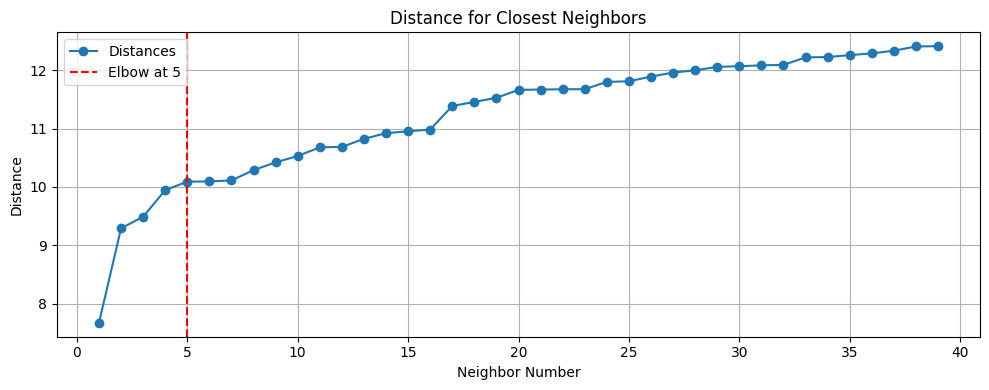

Stopping nearest neighbor search after suggesting neighbor number. Set run_NN=True and suggest_neighbor_num=False for full search.



In [12]:
neighbors_df, primer_dict = re_LAISS(
    transient_ztf_id='ZTF21aaublej',
    path_to_dataset_bank='../data/df_bank.csv',
    path_to_sfd_data_folder='../data/sfddata-master',
    host_feature_names=host_feature_names,
    lc_feature_names=lc_feature_names,
    neighbors=40,
    suggest_neighbor_num=True,
    run_NN=False,
    run_AD=False,
    save_figures=True,
)

You'll see that some files were created for the similarity search. And, our neighbor distance plot is displayed. It looks like anywhere from 5 to 7 neighbors is a reasonable cutoff, so let's use 7 and run the full neighbor search by setting `suggest_neighbor_num=False` and `run_NN=True`.

Loading previously saved ANNOY index...
Done!

ZTF21aaublej is in dataset_bank.
Timeseries dataframe for ZTF21aaublej is already made. Continue!

Loading previously saved ANNOY index without PCA: ../annoy_indices/re_laiss_annoy_index_pcaFalse_19lc_18host.ann 

First neighbor is input transient, so it will be excluded. Final neighbor count will be one less than expected.
						 ZTFID     IAU_NAME SPEC  Z
Input transient: https://alerce.online/object/ZTF21aaublej 2021ixf SN Ia 0.041

Making a plot of stacked lightcurves...


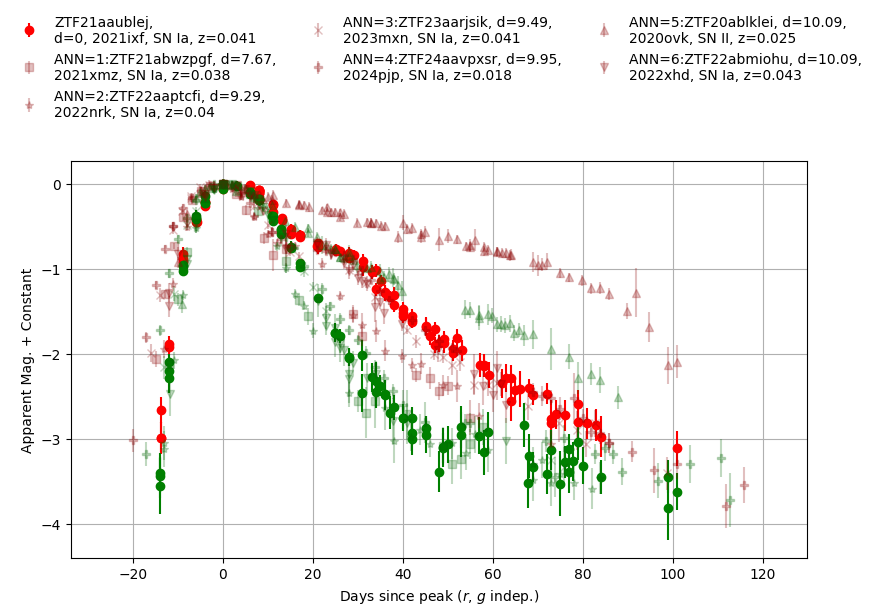


Generating hosts grid plot...


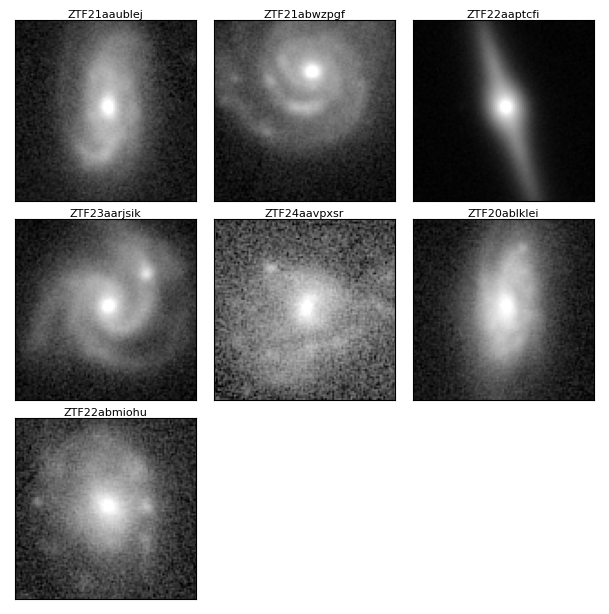

ANN=1: https://alerce.online/object/ZTF21abwzpgf 2021xmz SN Ia, 0.0375690013
ANN=2: https://alerce.online/object/ZTF22aaptcfi 2022nrk SN Ia, 0.039681
ANN=3: https://alerce.online/object/ZTF23aarjsik 2023mxn SN Ia, 0.0411
ANN=4: https://alerce.online/object/ZTF24aavpxsr 2024pjp SN Ia, 0.018
ANN=5: https://alerce.online/object/ZTF20ablklei 2020ovk SN II, 0.025
ANN=6: https://alerce.online/object/ZTF22abmiohu 2022xhd SN Ia, 0.043

ANN elapsed_time: 0.006 s
total elapsed_time: 15.215 s



In [6]:
neighbors_df, primer_dict = re_LAISS(
    transient_ztf_id='ZTF21aaublej',
    path_to_dataset_bank='../data/df_bank.csv',
    path_to_sfd_data_folder='../data/sfddata-master',
    host_feature_names=host_feature_names,
    lc_feature_names=lc_feature_names,
    neighbors=7,
    suggest_neighbor_num=False,
    run_NN=True,
    run_AD=False,
    save_figures=False,
)

Congratulations on your first similarity search! You can see a plot of the input suprnova lightcurve, as well as the neighbor lightcurves. They're not a great match right now. And, you see a plot of the input supernova host galaxy, as well as the neighbor hosts. These look decently similar. So, let's say you wanted a better lightcurve matches for your supernova. You could try using Monte Carlo simulation or lightcurve upweighting. Or, you could pass in an empty host features list; this would run a "lighcurve-only" reLAISS that picks neighbors based only on lightcurve properties.

The code below uses 20 Monte Carlo simulations with upweighted lightcurve features. Run it and you should see that the matches look much better! Experimenting with parameters and feature sets is a key functionality of reLAISS that can help you find better matches.

Loading previously saved ANNOY index...
Done!

ZTF21aaublej is in dataset_bank.
Timeseries dataframe for ZTF21aaublej is already made. Continue!

Loading previously saved ANNOY index without PCA: ../annoy_indices/re_laiss_annoy_index_pcaFalse_19lc_18host.ann 

Running Monte Carlo simulation to find possible neighbors...
Number of unique neighbors found through Monte Carlo: 7.
Picking top 7 neighbors.
First neighbor is input transient, so it will be excluded. Final neighbor count will be one less than expected.
						 ZTFID     IAU_NAME SPEC  Z
Input transient: https://alerce.online/object/ZTF21aaublej 2021ixf SN Ia 0.041

Making a plot of stacked lightcurves...


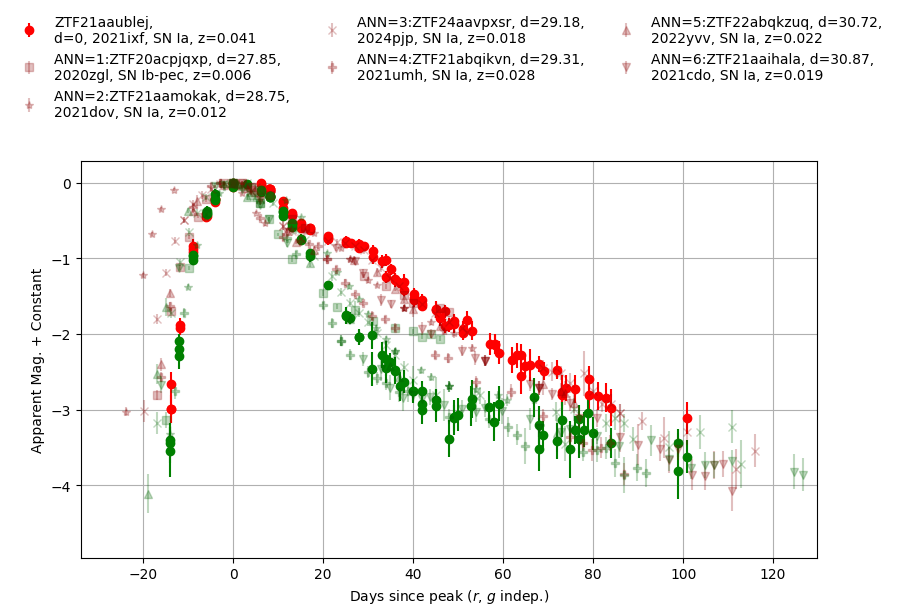


Generating hosts grid plot...


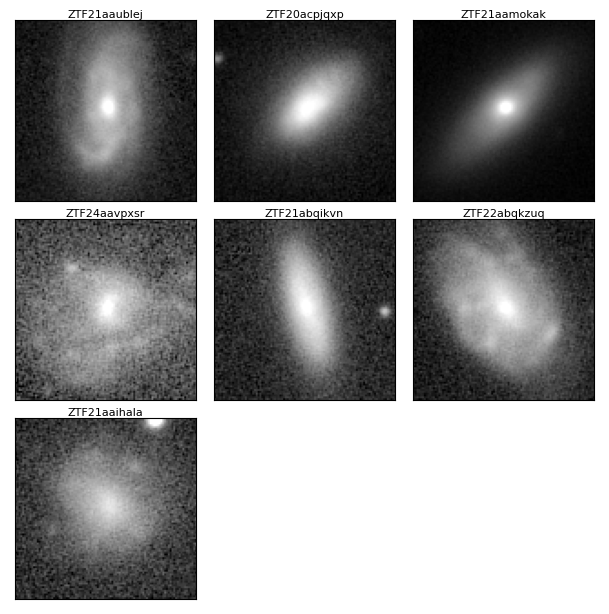

ANN=1: https://alerce.online/object/ZTF20acpjqxp 2020zgl SN Ib-pec, 0.0065
ANN=2: https://alerce.online/object/ZTF21aamokak 2021dov SN Ia, 0.012
ANN=3: https://alerce.online/object/ZTF24aavpxsr 2024pjp SN Ia, 0.018
ANN=4: https://alerce.online/object/ZTF21abqikvn 2021umh SN Ia, 0.02836
ANN=5: https://alerce.online/object/ZTF22abqkzuq 2022yvv SN Ia, 0.022
ANN=6: https://alerce.online/object/ZTF21aaihala 2021cdo SN Ia, 0.019

ANN elapsed_time: 0.004 s
total elapsed_time: 15.433 s



In [7]:
neighbors_df, primer_dict = re_LAISS(
    transient_ztf_id='ZTF21aaublej',
    path_to_dataset_bank='../data/df_bank.csv',
    path_to_sfd_data_folder='../data/sfddata-master',
    host_feature_names=host_feature_names,
    lc_feature_names=lc_feature_names,
    neighbors=7,
    suggest_neighbor_num=False,
    run_NN=True,
    run_AD=False,
    save_figures=False,
    num_mc_simulations=20,
    weight_lc_feats_factor=3,
)

Lastly, we'll run anomaly detection on the supernova of interest. This will produce a pdf of the lightcurve of the input supernova, as well as a graph of the probability (in time) that the supernova is anomalous. If the probability is ever over 50%, the supernova is flagged as anomalous.

As a reminder, if you're only running anomaly detection, reLAISS returns nothing.

Running Anomaly Detection:

Checking if AD model exists...
Model already exists → ../models/IForest_n500_c0.02_ms1024_lc19_host18.pkl

Rebuilding timeseries dataframe(s) for AD...
Extracted lightcurve features for ZTF21aaublej in 7.10s!
Searching for host galaxy...
Host identified.
Engineering features...
Finished engineering features.

Prediction doesn't exceed anom_threshold of 50% for ZTF21aaublej.
max_anom_score 40.2
num_anom_epochs 0 



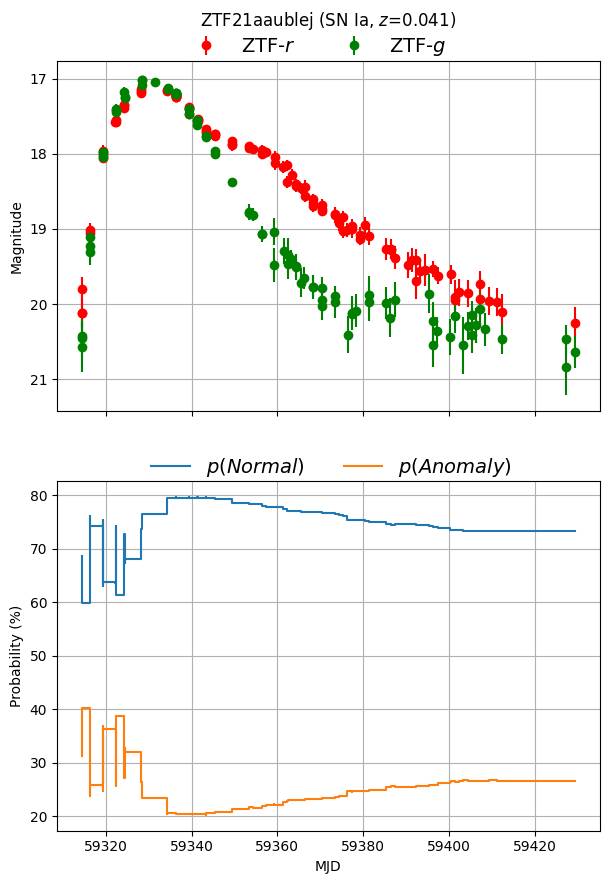

In [9]:
re_LAISS(
    transient_ztf_id='ZTF21aaublej',
    path_to_dataset_bank='../data/df_bank.csv',
    path_to_sfd_data_folder='../data/sfddata-master',
    host_feature_names=host_feature_names,
    lc_feature_names=lc_feature_names,
    suggest_neighbor_num=False,
    run_NN=False,
    run_AD=True,
    save_figures=False,
)

That concludes the tutorial on the basics of reLAISS! Below is an example of how to run the similarity search and anomaly detection at once, while saving important figures. Try it out if you'd like.

And, see notebook tutorial 02 for a walkthrough of some of the more advanced functionalities of reLAISS!

Loading previously saved ANNOY index...
Done!

ZTF21aaublej is in dataset_bank.
Timeseries dataframe for ZTF21aaublej is already made. Continue!

Loading previously saved ANNOY index without PCA: ../annoy_indices/re_laiss_annoy_index_pcaFalse_19lc_18host.ann 

Running Monte Carlo simulation to find possible neighbors...
Number of unique neighbors found through Monte Carlo: 7.
Picking top 7 neighbors.
First neighbor is input transient, so it will be excluded. Final neighbor count will be one less than expected.
						 ZTFID     IAU_NAME SPEC  Z
Input transient: https://alerce.online/object/ZTF21aaublej 2021ixf SN Ia 0.041

Making a plot of stacked lightcurves...
Saved lightcurve plot to:../figures/lightcurves/ZTF21aaublej.png


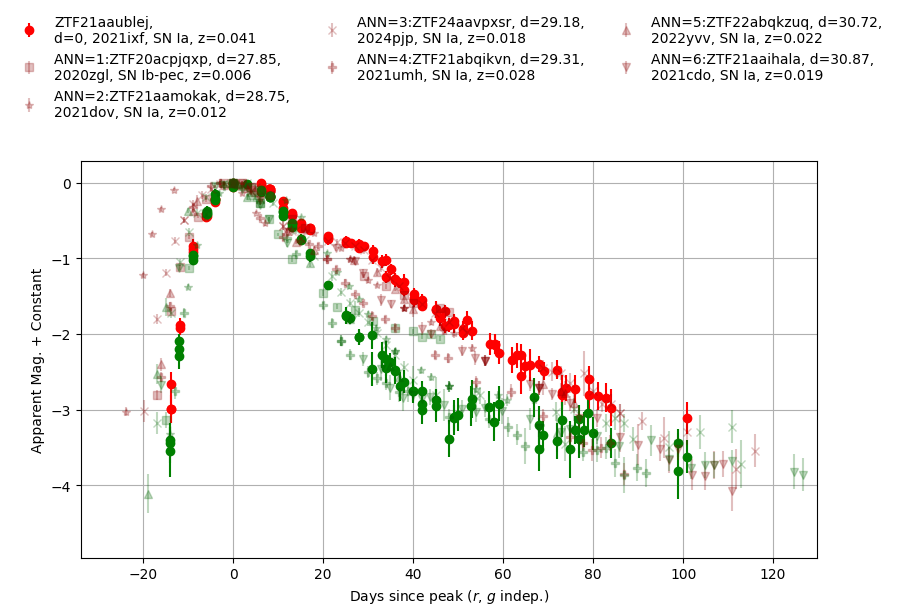


Generating hosts grid plot...


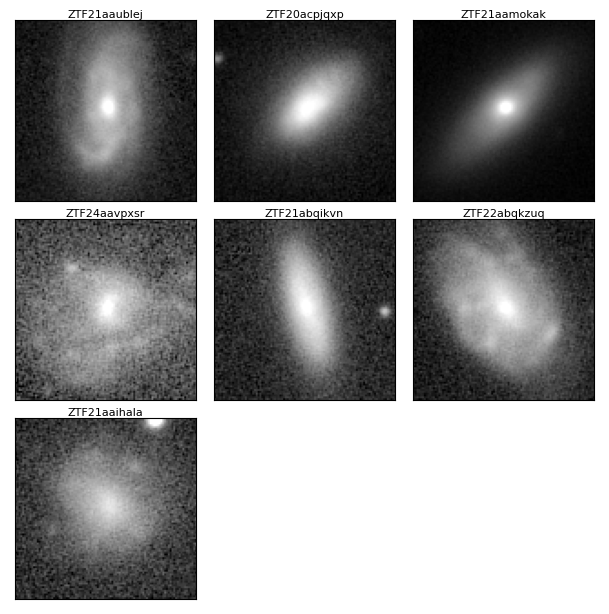

PDF written to ../figures/host_grids/ZTF21aaublej_host_thumbnails_ann=7.pdf

ANN=1: https://alerce.online/object/ZTF20acpjqxp 2020zgl SN Ib-pec, 0.0065
ANN=2: https://alerce.online/object/ZTF21aamokak 2021dov SN Ia, 0.012
ANN=3: https://alerce.online/object/ZTF24aavpxsr 2024pjp SN Ia, 0.018
ANN=4: https://alerce.online/object/ZTF21abqikvn 2021umh SN Ia, 0.02836
ANN=5: https://alerce.online/object/ZTF22abqkzuq 2022yvv SN Ia, 0.022
ANN=6: https://alerce.online/object/ZTF21aaihala 2021cdo SN Ia, 0.019

ANN elapsed_time: 0.004 s
total elapsed_time: 17.367 s

Running Anomaly Detection:

Checking if AD model exists...
Model already exists → ../models/IForest_n500_c0.02_ms1024_lc19_host18.pkl

Rebuilding timeseries dataframe(s) for AD...
Extracted lightcurve features for ZTF21aaublej in 6.72s!
Searching for host galaxy...
Host identified.
Engineering features...
Finished engineering features.

Prediction doesn't exceed anom_threshold of 50% for ZTF21aaublej.
max_anom_score 40.2
num_anom_epoch

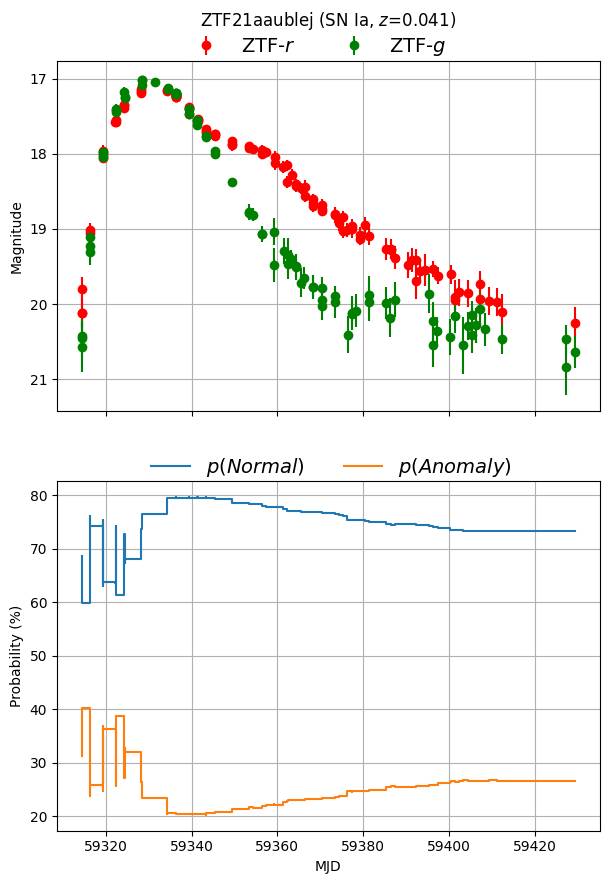

In [13]:
neighbors_df, primer_dict = re_LAISS(
    transient_ztf_id='ZTF21aaublej',
    path_to_dataset_bank='../data/df_bank.csv',
    path_to_sfd_data_folder='../data/sfddata-master',
    host_feature_names=host_feature_names,
    lc_feature_names=lc_feature_names,
    neighbors=7,
    suggest_neighbor_num=False,
    run_NN=True,
    run_AD=True,
    save_figures=True,
    num_mc_simulations=20,
    weight_lc_feats_factor=3,
)